<a href="https://colab.research.google.com/github/pascal-maker/3DDFA_V2/blob/master/Labo_05_Correlatie_Lineaire_Regressie_opdrachtPascalMusabyimana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <span style="color:darkorange"> Correlatie & lineaire regressie opdracht - League of legends
<img src="Lol.jpg">

</br>
</br>



<img src="League of legends.jpg">

Voor een korte uitleg over League of Legends bekijk dit [youtube filmpje](https://www.youtube.com/watch?v=BGtROJeMPeE&feature=youtu.be)

Het bestand 'LoL_team_stats.csv' bevat:

| Variable Name |Description |
| --- | --- |
|kills	|number of kills by the entire team (numeric)|
|deaths|	number of deaths in the entire team (numeric)|
|assists|	 number of assists by the entire team (numeric)|
|killingsprees  |	amount of killing sprees of the entire team (numeric)|
|double kills|	amount of double kills by the entire team (numeric)|
|tripple kills|	amount of tripple kills by the entire team (numeric)|
|totdmgdealt|	total damage dealt by the entire team (numeric)|
|totdmgtochamp	| total damage dealt by the entire team to enemy champions (numeric) |
|totheal |	total amount of damage healed by the entire team (numeric)|
|totunitshealed |	total amount of units healed by the entire team (numeric|
|dmgtoobj |	total damage to objectives(turret, nexus, inhibitor) by the entire team|
|dmgtoturrets |	total damage to turrets (numeric)|
|visionscore |	total vision score by the entire team(numeric)|
|totdmgtaken |	total damage taken by the entire team (numeric)|
|goldearned |	total amount of gold earned by the entire team(numeric)|
|goldspent  |	total amount of gold spent by the entire team(numeric)|
|turretkills |	number of turretkills by the entire team (numeric)|
|inhibkills | number of turretkills by the entire team (numeric)|
|totminionskilled | number of minions killed by the entire team(numeric)|
|neutralminionskilled | number of minions killed in the jungle (numeric)|
|totcctimedealt | total crowd control time (ability to directly hinder a unit's ability to fight e.g. a stun) dealt (numeric)|
|pinksbought| number of vision wards bought (https://leagueoflegends.fandom.com/wiki/Vision_Ward) (numeric)|
|wardsbought| numer of wards bought (numeric)|
|wardsplaced| number of wards placed (numeric)|
|wardskilled | number of wards killed (numeric)|
|largestkillingspree| the largest killing spree of the team (numeric)|
|largestmultikill | largest multi kill of the team (numeric)|
|largestcrit| largest critical strike of the team (numeric)|
|ownjunglekills| amount of own jungle kills (numeric)|
|enemyjunglekills| amount of enemy jungle kills (numeric) |
|win | Wheter the team won or lost (binary: 0:Loss, 1: Win) |


Deze statistieken zijn afkomstig van teams die aan "the red side" spelen

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from matplotlib import style
import seaborn as sns
from sklearn import datasets, linear_model
pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',1000)
import warnings
warnings.filterwarnings("ignore")

import scipy
import scipy.stats

In [2]:
dataset = pd.read_csv('LoL_team_stats.csv')
dataset.head()

,kills,deaths,assists,killingsprees,doublekills,triplekills,totdmgdealt,totdmgtochamp,totheal,totunitshealed,dmgtoobj,dmgtoturrets,visionscore,totdmgtaken,goldearned,goldspent,turretkills,inhibkills,totminionskilled,neutralminionskilled,totcctimedealt,pinksbought,wardsbought,wardsplaced,wardskilled,largestkillingspree,largestmultikill,largestcrit,ownjunglekills,enemyjunglekills,win
0,39,20,56,9,1,0,693679,104497,22618,8,66422,23578,138,94699,67965,63133,8,2,661,132,1735,7,0,54,10,12,2,843,81,30,1
1,32,20,41,7,3,1,436371,69090,13829,11,40373,27746,80,72978,53872,44493,6,2,499,87,1137,2,0,41,5,6,3,1211,41,28,1
2,33,39,45,10,2,1,671974,110564,49455,7,47074,15259,116,166427,68135,57945,6,0,759,114,2137,0,0,69,1,4,3,486,51,48,1
3,45,28,70,10,4,0,478826,90721,23158,12,63302,21778,115,117501,62032,54033,7,1,568,57,1312,3,0,49,5,8,2,817,19,25,1
4,39,32,52,12,1,0,584743,116459,28432,12,36481,24004,78,122907,65539,57500,7,4,665,101,2007,5,0,49,6,5,2,1686,53,34,1


In [3]:
dataset.shape

(47581, 31)

In [4]:
dataset.describe()

,kills,deaths,assists,killingsprees,doublekills,triplekills,totdmgdealt,totdmgtochamp,totheal,totunitshealed,dmgtoobj,dmgtoturrets,visionscore,totdmgtaken,goldearned,goldspent,turretkills,inhibkills,totminionskilled,neutralminionskilled,totcctimedealt,pinksbought,wardsbought,wardsplaced,wardskilled,largestkillingspree,largestmultikill,largestcrit,ownjunglekills,enemyjunglekills,win
count,47581.000000,47581.000000,47581.000000,47581.000000,47581.000000,47581.000000,4.758100e+04,47581.000000,47581.000000,47581.000000,47581.000000,47581.000000,47581.000000,47581.000000,47581.000000,47581.000000,47581.000000,47581.000000,47581.000000,47581.000000,47581.000000,47581.000000,47581.000000,47581.000000,47581.000000,47581.000000,47581.000000,47581.000000,47581.000000,47581.000000,47581.000000
mean,28.038103,28.661945,40.148442,6.480465,1.574473,0.298754,5.616773e+05,85480.623547,26453.820159,11.073433,20759.614048,10442.849331,71.041487,113526.103592,55954.285513,50823.614993,4.396671,0.832475,600.714003,98.239528,1931.466468,5.046216,0.001807,57.288897,8.852903,5.415460,2.127152,801.416006,47.392026,27.353544,0.476388
std,12.667170,12.495578,21.613643,3.406732,1.184914,0.518149,2.337212e+05,39131.978230,14755.146139,4.093247,24689.358992,9892.828406,68.031845,45382.740715,17883.082004,16912.797324,3.263074,1.088918,183.109353,40.350310,1269.159642,3.278541,0.042476,21.133639,6.302774,2.803241,0.804761,495.718079,17.449824,15.233786,0.499447
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.982000e+03,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000,644.000000,3382.000000,1500.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,20.000000,24.000000,4.000000,1.000000,0.000000,4.067770e+05,58592.000000,15910.000000,8.000000,0.000000,67.000000,0.000000,83927.000000,44941.000000,40641.000000,1.000000,0.000000,498.000000,71.000000,1128.000000,3.000000,0.000000,44.000000,4.000000,4.000000,2.000000,471.000000,36.000000,17.000000,0.000000
50%,29.000000,29.000000,39.000000,6.000000,1.000000,0.000000,5.513580e+05,82851.000000,24112.000000,11.000000,7923.000000,7319.000000,72.000000,111170.000000,56968.000000,51520.000000,4.000000,0.000000,606.000000,96.000000,1630.000000,5.000000,0.000000,57.000000,8.000000,5.000000,2.000000,724.000000,47.000000,26.000000,0.000000
75%,37.000000,37.000000,55.000000,9.000000,2.000000,1.000000,7.034010e+05,109370.000000,34471.000000,13.000000,40719.000000,20133.000000,123.000000,141067.000000,67806.000000,61825.000000,7.000000,2.000000,714.000000,124.000000,2370.000000,7.000000,0.000000,70.000000,12.000000,7.000000,3.000000,1068.000000,59.000000,36.000000,1.000000
max,73.000000,78.000000,129.000000,20.000000,6.000000,2.000000,1.540107e+06,250818.000000,90416.000000,29.000000,120471.000000,50231.000000,344.000000,302098.000000,116036.000000,120458.000000,13.000000,5.000000,1316.000000,265.000000,9412.000000,18.000000,1.000000,145.000000,36.000000,17.000000,5.000000,2850.000000,117.000000,90.000000,1.000000


In [5]:
# Correlatiecoefficient via Pandas
correlatiecoefficienten = dataset.corr()
print(correlatiecoefficienten)

                         kills    deaths   assists  killingsprees  \
kills                 1.000000  0.356126  0.883832       0.913673   
deaths                0.356126  1.000000  0.338160       0.327616   
assists               0.883832  0.338160  1.000000       0.815617   
killingsprees         0.913673  0.327616  0.815617       1.000000   
doublekills           0.647047  0.142601  0.596714       0.574970   
triplekills           0.375837  0.044752  0.364849       0.307022   
totdmgdealt           0.741048  0.491367  0.732285       0.689179   
totdmgtochamp         0.839036  0.583623  0.828276       0.778387   
totheal               0.625490  0.360037  0.663016       0.582142   
totunitshealed        0.313109  0.172100  0.383349       0.287328   
dmgtoobj              0.404292 -0.032549  0.376403       0.378203   
dmgtoturrets          0.491400 -0.136219  0.433313       0.454505   
visionscore           0.259298  0.163129  0.283396       0.246968   
totdmgtaken           0.674070  0.

Text(0.5, 1.0, 'heatmap dataset')

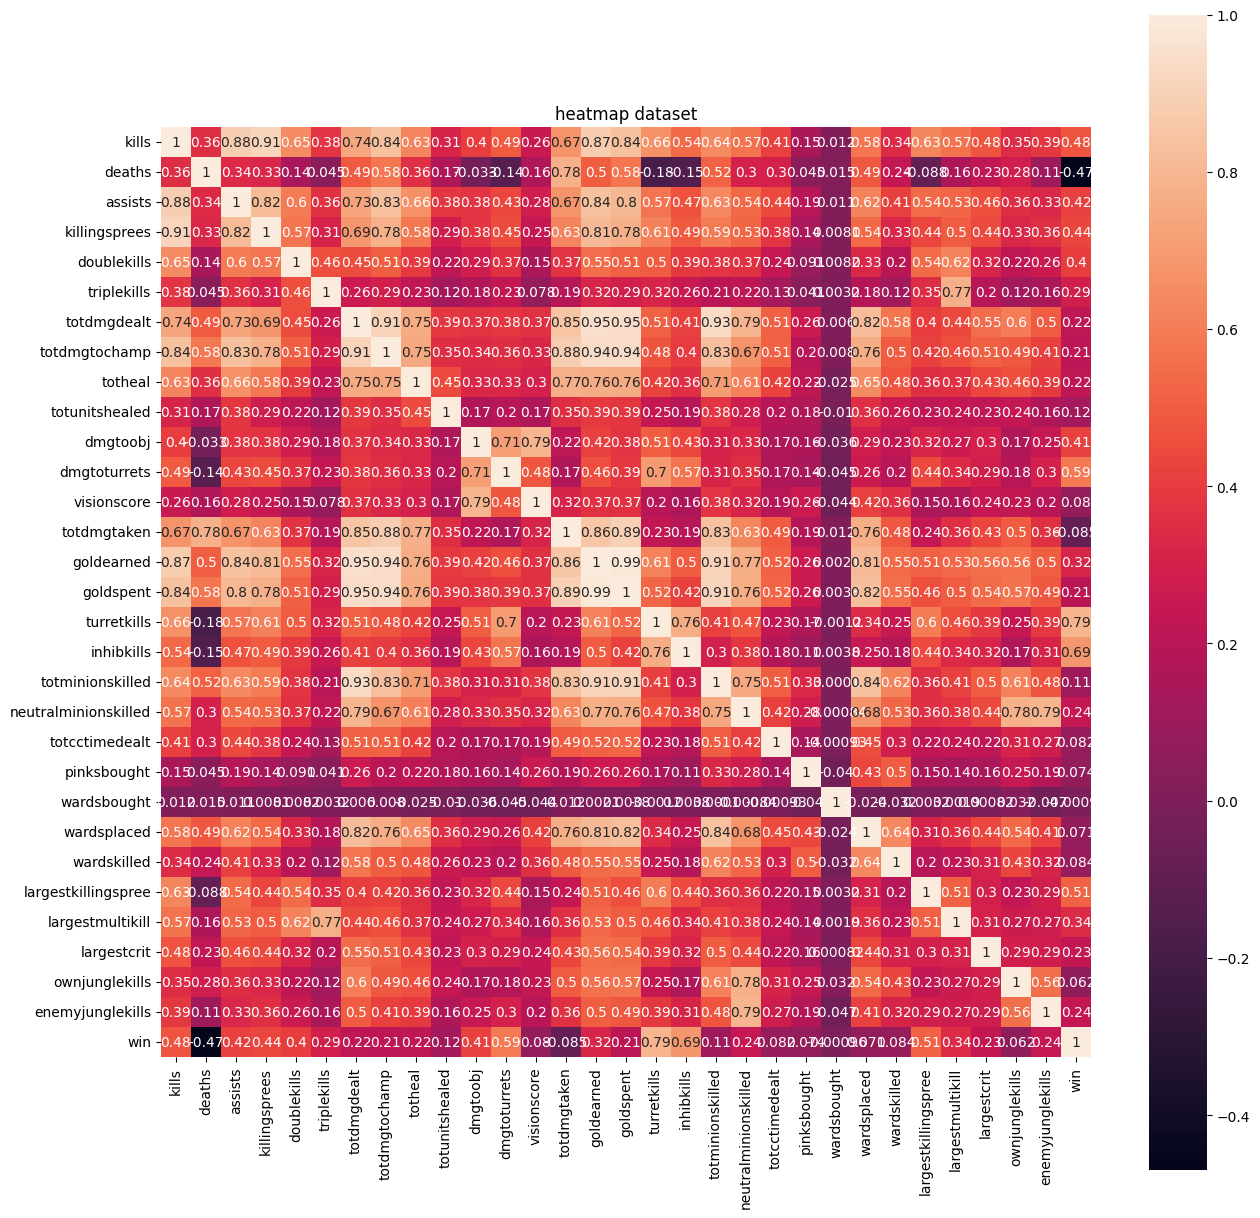

In [6]:
# Visualiseer de onderlinge correlatiecoëfficiënten
plt.figure(figsize=(15,15))
sns.heatmap(data= correlatiecoefficienten,square=True, annot=True)
plt.title("heatmap dataset")

#### <span style="color:deeppink"> Hoeveel spellen werden er gewonnen en hoeveel spellen werden er verloren? Visualiseer dit aan de hand van de gepaste grafiek en bereken de percentages gewonnen en verloren spellen. </span>

In [8]:
win_counts = dataset['win'].value_counts()
print(win_counts)
total_games = len(dataset)
pct_win = (win_counts[1] / total_games) * 100
pct_loss = (win_counts[0] / total_games) * 100

print(f"Aantal gewonnen spellen: {win_counts[1]} ({pct_win:.2f}%)")
print(f"Aantal verloren spellen: {win_counts[0]} ({pct_loss:.2f}%)")



win
0    24914
1    22667
Name: count, dtype: int64
Aantal gewonnen spellen: 22667 (47.64%)
Aantal verloren spellen: 24914 (52.36%)


#### <span style="color:deeppink"> Welke kolom heeft de grootste negatieve impact op een win? En welke de grootste positieve impact?


In [9]:
corr_with_win = dataset.corr()['win'].sort_values()
print(corr_with_win)


deaths                 -0.469191
totdmgtaken            -0.084760
wardsbought            -0.000960
ownjunglekills          0.061562
wardsplaced             0.070772
pinksbought             0.073988
visionscore             0.079775
totcctimedealt          0.081960
wardskilled             0.083726
totminionskilled        0.106163
totunitshealed          0.124380
goldspent               0.207853
totdmgtochamp           0.211702
totdmgdealt             0.222436
totheal                 0.223254
largestcrit             0.234966
neutralminionskilled    0.239577
enemyjunglekills        0.239938
triplekills             0.288484
goldearned              0.320683
largestmultikill        0.342544
doublekills             0.403418
dmgtoobj                0.411242
assists                 0.419951
killingsprees           0.436818
kills                   0.475852
largestkillingspree     0.514142
dmgtoturrets            0.592445
inhibkills              0.686380
turretkills             0.787768
win       

In [10]:
import pandas as pd

corr_with_win = dataset.corr()['win']

# Naam (kolomlabel) met de kleinste correlatiewaarde
col_min = corr_with_win.idxmin()
val_min = corr_with_win.min()

# Naam (kolomlabel) met de grootste correlatiewaarde
col_max = corr_with_win.idxmax()
val_max = corr_with_win.max()

print(f"Grootste negatieve correlatie met 'win': {col_min} (correlatie = {val_min:.3f})")
print(f"Grootste positieve correlatie met 'win': {col_max} (correlatie = {val_max:.3f})")


Grootste negatieve correlatie met 'win': deaths (correlatie = -0.469)
Grootste positieve correlatie met 'win': win (correlatie = 1.000)


#### <span style="color:deeppink"> Bepaal de correlatie tussen de volgende kolommen:

| kolom 1 | kolom 2 |
| --- | --- |
|total damage dealt	| total minions killed |
|wards placed |	total damage dealt |
|total damage taken	| total healed |
|gold spent |	total damage taken |
|gold spent |	total damage dealt |
|gold spent |	total healed |

In [11]:
pairs = [
    ('totdmgdealt', 'totminionskilled'),
    ('wardsplaced', 'totdmgdealt'),
    ('totdmgtaken', 'totheal'),
    ('goldspent', 'totdmgtaken'),
    ('goldspent', 'totdmgdealt'),
    ('goldspent', 'totheal')
]

for col1, col2 in pairs:
    corr_value = dataset[[col1, col2]].corr().iloc[0,1]
    print(f"Correlatie tussen {col1} en {col2} = {corr_value:.3f}")


Correlatie tussen totdmgdealt en totminionskilled = 0.932
Correlatie tussen wardsplaced en totdmgdealt = 0.818
Correlatie tussen totdmgtaken en totheal = 0.772
Correlatie tussen goldspent en totdmgtaken = 0.892
Correlatie tussen goldspent en totdmgdealt = 0.946
Correlatie tussen goldspent en totheal = 0.756


#### <span style="color:deeppink"> Bepaal de regressielijn tussen de kills & de total damage to champs

Coefficient (helling)  = 2591.9872686568065
Intercept             = 12806.21638139298
R^2                   = 0.7039816687004337


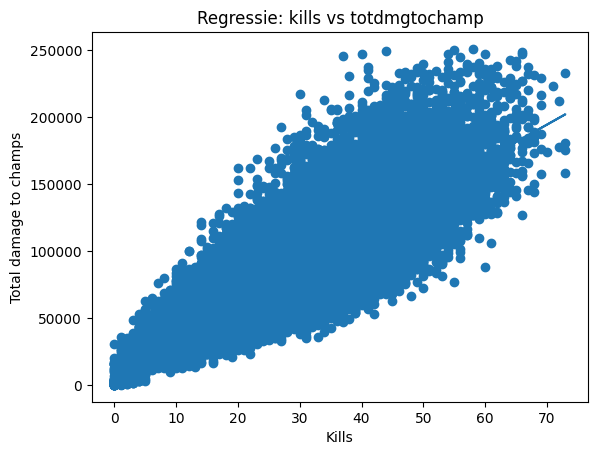

In [14]:
X = dataset[['kills']]  # onafhankelijke variabele (in dataframe-vorm)
y = dataset['totdmgtochamp']  # afhankelijke variabele (reeks)

linreg = LinearRegression()
linreg.fit(X, y)

print("Coefficient (helling)  =", linreg.coef_[0])
print("Intercept             =", linreg.intercept_)
print("R^2                   =", linreg.score(X, y))

# Plot
plt.figure()
plt.scatter(X, y)
# Lijn van de regressie
pred_line = linreg.predict(X)
plt.plot(X, pred_line)
plt.title("Regressie: kills vs totdmgtochamp")
plt.xlabel("Kills")
plt.ylabel("Total damage to champs")
plt.show()


Probeer de total damage to champs te voorspellen als er 12 kills zijn.

In [15]:
kills_test = np.array([[12]])  # 2D array: sklearn vereist dit
prediction_12 = linreg.predict(kills_test)
print(f"Voorspelling total damage to champs bij 12 kills = {prediction_12[0]:.2f}")


Voorspelling total damage to champs bij 12 kills = 43910.06


Indien je de outliers verwijdert uit de dataset, resulteert dit in een betere voorspelling?

In [16]:
from scipy.stats import zscore

df_no_outliers = dataset.copy()
df_no_outliers['z_kills'] = zscore(df_no_outliers['kills'])
df_no_outliers['z_dmg']   = zscore(df_no_outliers['totdmgtochamp'])

condition = (
    (df_no_outliers['z_kills'].abs() < 3) &
    (df_no_outliers['z_dmg'].abs() < 3)
)
df_no_outliers = df_no_outliers[condition]

# Nieuwe regressie op df_no_outliers
X_no_out = df_no_outliers[['kills']]
y_no_out = df_no_outliers['totdmgtochamp']

linreg_no_out = LinearRegression()
linreg_no_out.fit(X_no_out, y_no_out)

print("Zonder outliers:")
print("R^2 =", linreg_no_out.score(X_no_out, y_no_out))

kills_test = np.array([[12]])
prediction_12_no_out = linreg_no_out.predict(kills_test)
print(f"Voorspelde damage bij 12 kills = {prediction_12_no_out[0]:.2f} (zonder outliers)")


Zonder outliers:
R^2 = 0.7025603869741104
Voorspelde damage bij 12 kills = 44363.78 (zonder outliers)


Probeer de total damage taken te voorspellen als er 12 deaths zijn gevallen.

In [17]:
X_d = dataset[['deaths']]
y_d = dataset['totdmgtaken']

linreg_d = LinearRegression()
linreg_d.fit(X_d, y_d)
r2_d = linreg_d.score(X_d, y_d)

print("Regressie deaths -> totdmgtaken:")
print("Coefficient =", linreg_d.coef_[0])
print("Intercept  =", linreg_d.intercept_)
print("R^2        =", r2_d)

# Eventueel voorspellen bij 12 deaths
deaths_test = np.array([[12]])
pred_12_deaths = linreg_d.predict(deaths_test)
print(f"Voorspelde total damage taken bij 12 deaths = {pred_12_deaths[0]:.2f}")


Regressie deaths -> totdmgtaken:
Coefficient = 2821.5088647689226
Intercept  = 32656.171991914307
R^2        = 0.6035233318079187
Voorspelde total damage taken bij 12 deaths = 66514.28


#### <span style="color:deeppink"> Bereken de regressielijn tussen gold earned en de damage to turrets

Coefficient = 0.25265661163654735
Intercept   = -3694.3708536749455
R^2         = 0.20859558816117585


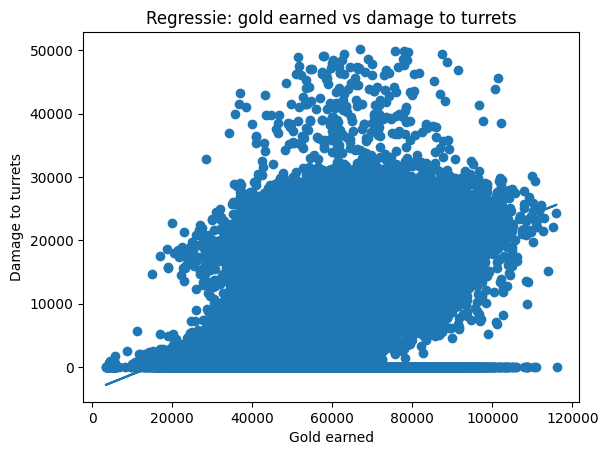

In [18]:
X_gt = dataset[['goldearned']]
y_gt = dataset['dmgtoturrets']

linreg_gt = LinearRegression()
linreg_gt.fit(X_gt, y_gt)

print("Coefficient =", linreg_gt.coef_[0])
print("Intercept   =", linreg_gt.intercept_)
print("R^2         =", linreg_gt.score(X_gt, y_gt))

plt.figure()
plt.scatter(X_gt, y_gt)
plt.plot(X_gt, linreg_gt.predict(X_gt))
plt.title("Regressie: gold earned vs damage to turrets")
plt.xlabel("Gold earned")
plt.ylabel("Damage to turrets")
plt.show()


Heeft hier het verwijderen van de outliers enige invloed?
Bekijk de grafiek aandachtig, zijn er foutieve of onlogische waarden aanwezig in de dataset? Heeft het verwijderen van dit soort data een invloed op de voorspelling?

#### <span style="color:deeppink"> Bereken de regressielijn tussen kills & gold earned

Coefficient = 1233.6818362887313
Intercept   = 21364.186569472964
R^2         = 0.7636262235681044


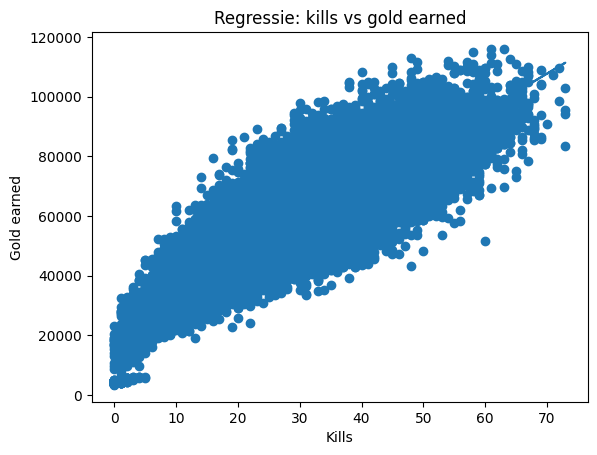

In [19]:
X_kills_gold = dataset[['kills']]
y_gold       = dataset['goldearned']

linreg_kg = LinearRegression()
linreg_kg.fit(X_kills_gold, y_gold)

print("Coefficient =", linreg_kg.coef_[0])
print("Intercept   =", linreg_kg.intercept_)
print("R^2         =", linreg_kg.score(X_kills_gold, y_gold))

plt.figure()
plt.scatter(X_kills_gold, y_gold)
plt.plot(X_kills_gold, linreg_kg.predict(X_kills_gold))
plt.title("Regressie: kills vs gold earned")
plt.xlabel("Kills")
plt.ylabel("Gold earned")
plt.show()


#### <span style="color:deeppink"> Kan je een betere voorspelling van total damage to champs aan de hand van het aantal kills doen indien je de winst of verlies in rekening brengt?

In [20]:
df_win = dataset[dataset['win'] == 1]
df_loss = dataset[dataset['win'] == 0]

linreg_win = LinearRegression().fit(df_win[['kills']], df_win['totdmgtochamp'])
linreg_loss = LinearRegression().fit(df_loss[['kills']], df_loss['totdmgtochamp'])

print("Winnende teams:")
print(" R^2 =", linreg_win.score(df_win[['kills']], df_win['totdmgtochamp']))
print(" Coeff kills =", linreg_win.coef_[0])
print(" Intercept   =", linreg_win.intercept_)

print("\nVerliezende teams:")
print(" R^2 =", linreg_loss.score(df_loss[['kills']], df_loss['totdmgtochamp']))
print(" Coeff kills =", linreg_loss.coef_[0])
print(" Intercept   =", linreg_loss.intercept_)

Winnende teams:
 R^2 = 0.6648769143951463
 Coeff kills = 2871.3952870273192
 Intercept   = -4488.014101166264

Verliezende teams:
 R^2 = 0.8039145248321993
 Coeff kills = 3011.3409787711844
 Intercept   = 10459.881438042168


Wat is de voorspelde total damage to champs bij 12 kills bij winst en verlies?

In [22]:
df_win = dataset[dataset['win'] == 1]
df_loss = dataset[dataset['win'] == 0]

linreg_win = LinearRegression().fit(df_win[['kills']], df_win['totdmgtochamp'])
linreg_loss = LinearRegression().fit(df_loss[['kills']], df_loss['totdmgtochamp'])

print("Winnende teams:")
print(" R^2 =", linreg_win.score(df_win[['kills']], df_win['totdmgtochamp']))
print(" Coeff kills =", linreg_win.coef_[0])
print(" Intercept   =", linreg_win.intercept_)

print("\nVerliezende teams:")
print(" R^2 =", linreg_loss.score(df_loss[['kills']], df_loss['totdmgtochamp']))
print(" Coeff kills =", linreg_loss.coef_[0])
print(" Intercept   =", linreg_loss.intercept_)

# Voorspelling bij 12 kills
kills_12 = np.array([[12]])
pred_win_12 = linreg_win.predict(kills_12)[0]
pred_loss_12 = linreg_loss.predict(kills_12)[0]
print(f"\nVoorspelde damage bij winst (12 kills) = {pred_win_12:.2f}")
print(f"Voorspelde damage bij verlies (12 kills) = {pred_loss_12:.2f}")


Winnende teams:
 R^2 = 0.6648769143951463
 Coeff kills = 2871.3952870273192
 Intercept   = -4488.014101166264

Verliezende teams:
 R^2 = 0.8039145248321993
 Coeff kills = 3011.3409787711844
 Intercept   = 10459.881438042168

Voorspelde damage bij winst (12 kills) = 29968.73
Voorspelde damage bij verlies (12 kills) = 46595.97


#### <span style="color:deeppink"> Kan je een betere voorspelling van damage to turret doen aan de hand van gold earned indien je de winst of verlies in rekening brengt?  
Je mag outliers of foutieve waarden uit de dataset verwijderen.

In [23]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# === STAP 1: Splitsen van de dataset ===
df_win = dataset[dataset['win'] == 1]
df_loss = dataset[dataset['win'] == 0]

# === STAP 2: Bouwen van twee regressies ===
# --- Winnende teams (win=1) ---
X_win = df_win[['goldearned']]  # voorspellers
y_win = df_win['dmgtoturrets']  # te voorspellen

model_win = LinearRegression().fit(X_win, y_win)
r2_win = model_win.score(X_win, y_win)
print("=== Winnende teams ===")
print("Coefficient (beta1) =", model_win.coef_[0])
print("Intercept (beta0)   =", model_win.intercept_)
print(f"R^2                 = {r2_win:.4f}\n")

# --- Verliezende teams (win=0) ---
X_loss = df_loss[['goldearned']]
y_loss = df_loss['dmgtoturrets']

model_loss = LinearRegression().fit(X_loss, y_loss)
r2_loss = model_loss.score(X_loss, y_loss)
print("=== Verliezende teams ===")
print("Coefficient (beta1) =", model_loss.coef_[0])
print("Intercept (beta0)   =", model_loss.intercept_)
print(f"R^2                 = {r2_loss:.4f}\n")

# Eventueel een voorspelling doen bij een bepaalde gold-waarde
sample_gold = np.array([[15000]])  # stel: 15k gold
pred_win = model_win.predict(sample_gold)[0]
pred_loss = model_loss.predict(sample_gold)[0]
print(f"Voorspelde dmgToTurrets bij winnende teams (15k gold): {pred_win:.2f}")
print(f"Voorspelde dmgToTurrets bij verliezende teams (15k gold): {pred_loss:.2f}")


=== Winnende teams ===
Coefficient (beta1) = 0.1528849975613448
Intercept (beta0)   = 7113.62590889421
R^2                 = 0.0632

=== Verliezende teams ===
Coefficient (beta1) = 0.1741564623353386
Intercept (beta0)   = -3939.6677009731047
R^2                 = 0.3114

Voorspelde dmgToTurrets bij winnende teams (15k gold): 9406.90
Voorspelde dmgToTurrets bij verliezende teams (15k gold): -1327.32


#### <span style="color:deeppink"> Kan je een betere voorspelling van gold earned doen aan de hand van kills indien je de winst of verlies in rekening brengt?  

In [24]:
df_win = dataset[dataset['win'] == 1]
df_loss = dataset[dataset['win'] == 0]

# Winnende teams
X_win = df_win[['kills']]
y_win = df_win['goldearned']
model_win = LinearRegression().fit(X_win, y_win)
print("=== Winnende teams ===")
print("Kills -> Gold Earned")
print("Coefficient =", model_win.coef_[0])
print("Intercept  =", model_win.intercept_)
print("R^2        =", model_win.score(X_win, y_win))

# Verliezende teams
X_loss = df_loss[['kills']]
y_loss = df_loss['goldearned']
model_loss = LinearRegression().fit(X_loss, y_loss)
print("\n=== Verliezende teams ===")
print("Kills -> Gold Earned")
print("Coefficient =", model_loss.coef_[0])
print("Intercept  =", model_loss.intercept_)
print("R^2        =", model_loss.score(X_loss, y_loss))

# Voorbeeldvoorspelling:
test_kills = np.array([[10]])  # stel 10 kills
pred_win_10kills = model_win.predict(test_kills)[0]
pred_loss_10kills = model_loss.predict(test_kills)[0]
print(f"\nVoorspelde gold earned (win=1, 10 kills) = {pred_win_10kills:.2f}")
print(f"Voorspelde gold earned (win=0, 10 kills) = {pred_loss_10kills:.2f}")


=== Winnende teams ===
Kills -> Gold Earned
Coefficient = 1262.9348910216231
Intercept  = 18575.349961185
R^2        = 0.6815262232321782

=== Verliezende teams ===
Kills -> Gold Earned
Coefficient = 1359.9312801888545
Intercept  = 20173.14631050209
R^2        = 0.808316603462755

Voorspelde gold earned (win=1, 10 kills) = 31204.70
Voorspelde gold earned (win=0, 10 kills) = 33772.46
